# Data overview

### Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation

### Load data

In [2]:
df1 = pd.read_csv("dataset1.csv")
df2 = pd.read_csv("dataset2.csv")

In [3]:
df1.head()

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,30/12/2017 18:37,16.000000,rat,30/12/2017 18:35,30/12/2017 18:38,108,1,0,0,30/12/2017 16:45,1.870833,0
1,30/12/2017 19:51,0.074016,fast,30/12/2017 19:50,30/12/2017 19:55,17,0,1,0,30/12/2017 16:45,3.100833,0
2,30/12/2017 19:51,4.000000,fast,30/12/2017 19:50,30/12/2017 19:55,41,0,1,0,30/12/2017 16:45,3.107500,0
3,30/12/2017 19:52,10.000000,rat,30/12/2017 19:50,30/12/2017 19:55,111,1,0,0,30/12/2017 16:45,3.126944,0
4,30/12/2017 19:54,15.000000,rat,30/12/2017 19:50,30/12/2017 19:55,194,1,0,0,30/12/2017 16:45,3.150000,0


In [4]:
df2.head()

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0


### Basic overview

In [5]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 907 non-null    object 
 1   bat_landing_to_food        907 non-null    float64
 2   habit                      866 non-null    object 
 3   rat_period_start           907 non-null    object 
 4   rat_period_end             907 non-null    object 
 5   seconds_after_rat_arrival  907 non-null    int64  
 6   risk                       907 non-null    int64  
 7   reward                     907 non-null    int64  
 8   month                      907 non-null    int64  
 9   sunset_time                907 non-null    object 
 10  hours_after_sunset         907 non-null    float64
 11  season                     907 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 85.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex

##### Some comments

- Data types conversion
  Convert all columns (`start_time`, `time`, `rat_period_start`, etc.) to `datetime64` for temporal analysis. 
  Typically convert all the object type column

- Missing values in "habit" column
  Handle missing values by:
  - Imputing based on mode or related features
  - Dropping rows if justified
  - Assigning a placeholder category like `"unknown" (e recommend this one)

- Unit standardization
  should be consistent across time-related columns - convert all durations to **seconds** or **minutes**, as appropriate.

- Time binning  
  Bin the `hours_after_sunset` column into categorical periods:
  - `Dusk`: 0–2 hours after sunset  
  - `Night`: 2–6 hours after sunset  
  - `Late Night`: 6+ hours after sunset  




## For dataset1

### Data types check

In [6]:
df1.dtypes

start_time                    object
bat_landing_to_food          float64
habit                         object
rat_period_start              object
rat_period_end                object
seconds_after_rat_arrival      int64
risk                           int64
reward                         int64
month                          int64
sunset_time                   object
hours_after_sunset           float64
season                         int64
dtype: object

#### Change the object datatype

In [7]:
# change the time to datetime 
datetime_cols = ['start_time', 'rat_period_start', 'rat_period_end', 'sunset_time']
for col in datetime_cols:
    df1[col] = pd.to_datetime(df1[col], format="%d/%m/%Y %H:%M", errors='coerce')

df1['habit'] = df1['habit'].astype('category')

df1.dtypes

start_time                   datetime64[ns]
bat_landing_to_food                 float64
habit                              category
rat_period_start             datetime64[ns]
rat_period_end               datetime64[ns]
seconds_after_rat_arrival             int64
risk                                  int64
reward                                int64
month                                 int64
sunset_time                  datetime64[ns]
hours_after_sunset                  float64
season                                int64
dtype: object

#### Habit columnn

In [8]:
# habit column check
df1["habit"].dtypes

CategoricalDtype(categories=['157.0,2.6,349.0,159.3; 572.1,275.7,638.3,360.0',
                  '187.0,152.0,304.0,240.0; 567.9,88.6,621.1,140.3',
                  '218.0,171.0,381.0,269.0; 239.0,106.0,315.0,155.0',
                  '243.6,235.6,432.2,329.8; 559.0,244.0,622.0,395.0',
                  '245.6,179.5,321.4,314.0; 522.4,0.3,592.0,95.5',
                  '373.0,80.0,504.0,148.0; 274.6,110.7,382.4,267.3',
                  '380.6,321.1,550.6,477.5; 263.0,267.0,421.0,435.0',
                  '397.7,159.7,580.2,330.5; 252.0,92.0,346.0,149.0',
                  '405.6,112.3,513.1,215.4; 464.1,197.7,614.9,334.3; 511.5,301.1,639.4,388.9',
                  '415.0,86.5,559.2,140.2; 66.0,157.0,285.0,279.0',
                  '417.7,117.1,635.5,346.0; 243.0,272.0,308.0,379.0; 438.0,230.0,494.0,291.0',
                  '423.0,155.9,535.6,370.9; 238.0,99.0,314.0,160.0',
                  '44.0,77.0,157.0,240.0; 253.0,96.0,346.0,147.0',
                  '501.0,358.4,636.2,423.4;

**description**: The context surrounding the landing event and the animals’ behaviour 

**habit**: Contains 81 behavior types with many rare or inconsistent labels + appear to be coordinates or spatial data that accidentally got included in the habit column --> remove those entries. Most invalid entries are number so I use regex function (first remove whitespace, lowercase for consistency then reject if it has numbers, commas, periods, semicolons, etc then apply it to 'unknown' if it is false)



In [9]:
import re
def is_valid_habit(val):
    if pd.isna(val):
        return False
    # remove whitespace, lowercase
    val = val.strip().lower()
    # reject if it matches pattern of only numbers, commas, periods, semicolons
    if re.fullmatch(r'[\d\.,;\s]+', val):
        return False
    return True

df1['habit'] = df1['habit'].astype(str)
df1['habit'] = df1['habit'].apply(lambda x: x if is_valid_habit(x) else 'unknown')

# convert to category
df1['habit'] = df1['habit'].astype('category')


df1['habit'].dtypes

CategoricalDtype(categories=['all_pick', 'attack_rat', 'bat', 'bat_and_pick',
                  'bat_and_pick_far', 'bat_and_rat', 'bat_fight',
                  'bat_fight_and_pick', 'bat_fight_and_rat', 'bat_fight_rat',
                  'bat_figiht', 'bat_pick', 'bat_pick_rat', 'bat_rat',
                  'bat_rat_pick', 'bats', 'both', 'bowl_out', 'eating',
                  'eating_and_bat_and_pick', 'eating_bat_pick',
                  'eating_bat_rat_pick', 'fast', 'fast_and_pick', 'fast_far',
                  'fight', 'fight_bat', 'fight_rat', 'gaze', 'nan', 'no_food',
                  'not_sure_rat', 'other', 'other directions', 'other_bat',
                  'other_bats', 'other_bats/rat', 'others', 'pick',
                  'pick_and_all', 'pick_and_bat', 'pick_and_others',
                  'pick_and_rat', 'pick_bat', 'pick_bat_rat',
                  'pick_eating_all', 'pick_rat', 'pick_rat_and_bat',
                  'pick_rat_bat', 'pup_and_mon', 'rat', 'rat attack',


In [10]:
# see which values is important 
counts = df1['habit'].value_counts()
filtered_counts = counts[counts == 1]
filtered_counts

habit
rat_attack                 1
rat_bat                    1
rat_bat_fight              1
rat_disappear              1
rat_pick_and_bat           1
rat_to_bat                 1
rat attack                 1
rat_and_bat_and_pick       1
rat_and_no_food            1
rat_and_others             1
bat_fight_rat              1
fight_bat                  1
gaze                       1
not_sure_rat               1
other                      1
other directions           1
other_bat                  1
other_bats/rat             1
bowl_out                   1
eating                     1
eating_and_bat_and_pick    1
eating_bat_pick            1
eating_bat_rat_pick        1
fast_and_pick              1
fast_far                   1
pick_bat_rat               1
pick_eating_all            1
pick_rat_and_bat           1
pick_rat_bat               1
attack_rat                 1
bat_figiht                 1
bat_pick_rat               1
bat_rat                    1
bat_rat_pick               1
pup_and_

**Let's look at the data**
- The context surrounding the landing event and the animals’ behaviour (what's the pdf said)
- In the investigation A questions it said: "Do bats perceive rats not just as competitors for food but also as potential predators? If rats are considered a predation risk by bats, scientists believe that this perception will translate into the bats’ higher level of avoidance behaviour or increased vigilance during foraging on the food platform" --> we stick to this to create our behaviour categories. ("Avoidance" + "Vigilance" vs "Normal Forgaging")
- I first proposed to put any value that has count < 1 to be "other" as it could act as an outlier, etc. But when I look at the data, there are still many values that should be considered. 

**Proposed way to fix**
- Correct typos (bat_figiht --> bat_fight).

- Map all the entries into a clean categories (manually, I also think about using NLP - hierachical clustering to divide them, but it's just cleaning data :v )

**Here's how I divided the data**

- Categories
    - Vigilance / Avoidance
        - High speed (fast), gaze/orientation changes — suggest caution or predator avoidance (bats considered rats as threats).
        - Labels such as: fast, fast_and_pick, fast_far, gaze

    - Foraging/ competitors
        - Any "pick" actions or bat–rat co-occurrence at food sites.
        - Labels: pick, bat_and_pick, rat_and_pick, pick_and_others, pick_and_bat, pick_and_rat, etc
    
    - Aggressive interactions
        - Fighting or attack — may indicate defense (predation risk) or food competition
        - Labels: bat_fight, fight, fight_rat, bat_fight_and_pick.
    - presence only
        - presence of bats/rats without actions — baseline for encounter rate.
        - bat, bats, other_bat, other_bats, rat, not_sure_rat, bat_and_rat
    - non-foraging/non-aggressive
        - No food or unclear activity — may link to seasonal scarcity.
        - no_food, rat_and_no_food, rat_disappear
    - Unknown
        - Vague, rare, or irrelevant labels.
        - nan, unknown, other, others, both, all_pick, bowl_out, pup_and_mon, other directions, rat_and_rat, rat_to_bat


In [11]:
# let's categorize it first
# replace the typo 
df1['habit'] = df1['habit'].replace('bat_figiht', 'bat_fight')


# Define categories
categories = {
    'Vigilance/Avoidance Behaviors': [],
    'Foraging/Competition Behaviors': [],
    'Aggressive Interactions': [],
    'Presence Only': [],
    'Non-Foraging/Non-Aggressive': [],
    'Unknown': []
}



labels, counts = np.unique(df1['habit'].values, return_counts=True)
value_counts = dict(zip(labels, counts))

# Categorize labels
for label in labels:
    count = value_counts.get(label, 1)
    if any(x in label for x in ['fast', 'gaze']):
        categories['Vigilance/Avoidance Behaviors'].append((label, count))
    elif 'pick' in label or 'eating' in label:
        categories['Foraging/Competition Behaviors'].append((label, count))
    elif any(x in label for x in ['fight', 'attack']):
        categories['Aggressive Interactions'].append((label, count))
    elif any(x in label for x in ['bat', 'bats', 'rat']) and 'pick' not in label and 'fight' not in label and 'attack' not in label and 'eating' not in label:
        categories['Presence Only'].append((label, count))
    elif any(x in label for x in ['no_food', 'disappear']):
        categories['Non-Foraging/Non-Aggressive'].append((label, count))
    else:
        categories['Unknown'].append((label, count))


#write some summary
category_summary = {}
for category, items in categories.items():
    total_count = sum(count for _, count in items)
    category_summary[category] = {'labels': items, 'total_count': total_count}

# output results
for category, data in category_summary.items():
    print(f"\n{category}(Total Count:{data['total_count']}):")
    for label, count in data['labels']:
        print(f"  - {label}:{count}")


Vigilance/Avoidance Behaviors(Total Count:248):
  - fast:245
  - fast_and_pick:1
  - fast_far:1
  - gaze:1

Foraging/Competition Behaviors(Total Count:238):
  - all_pick:5
  - bat_and_pick:20
  - bat_and_pick_far:1
  - bat_fight_and_pick:1
  - bat_pick:3
  - bat_pick_rat:1
  - bat_rat_pick:1
  - eating:1
  - eating_and_bat_and_pick:1
  - eating_bat_pick:1
  - eating_bat_rat_pick:1
  - pick:139
  - pick_and_all:3
  - pick_and_bat:8
  - pick_and_others:8
  - pick_and_rat:6
  - pick_bat:6
  - pick_bat_rat:1
  - pick_eating_all:1
  - pick_rat:4
  - pick_rat_and_bat:1
  - pick_rat_bat:1
  - rat_and_bat_and_pick:1
  - rat_and_pick:8
  - rat_pick:14
  - rat_pick_and_bat:1

Aggressive Interactions(Total Count:38):
  - attack_rat:1
  - bat_fight:27
  - bat_fight_and_rat:1
  - bat_fight_rat:1
  - fight:2
  - fight_bat:1
  - fight_rat:2
  - rat attack:1
  - rat_attack:1
  - rat_bat_fight:1

Presence Only(Total Count:308):
  - bat:30
  - bat_and_rat:19
  - bat_rat:1
  - bats:7
  - not_sure_rat:1


In [12]:
# map the data
def map_to_category(label):
    label = str(label).lower()
    if any(x in label for x in ['fast', 'gaze']):
        return 'Vigilance/Avoidance Behaviors'
    elif 'pick' in label or 'eating' in label:
        return 'Foraging/Competition Behaviors'
    elif any(x in label for x in ['fight', 'attack']):
        return 'Aggressive Interactions'
    elif any(x in label for x in ['bat', 'bats', 'rat']) and all(x not in label for x in ['pick', 'fight', 'attack', 'eating']):
        return 'Presence Only'
    elif any(x in label for x in ['no_food', 'disappear']):
        return 'Non-Foraging/Non-Aggressive'
    else:
        return 'Unknown'

# Apply the mapping to create a new column
df1['habit_category'] = df1['habit'].apply(map_to_category)

df1['habit_category'].value_counts()

habit_category
Presence Only                     308
Vigilance/Avoidance Behaviors     248
Foraging/Competition Behaviors    238
Unknown                            71
Aggressive Interactions            38
Non-Foraging/Non-Aggressive         4
Name: count, dtype: int64

#### Risk, Reward, Season and month columns

In [13]:
df1.dtypes

start_time                   datetime64[ns]
bat_landing_to_food                 float64
habit                              category
rat_period_start             datetime64[ns]
rat_period_end               datetime64[ns]
seconds_after_rat_arrival             int64
risk                                  int64
reward                                int64
month                                 int64
sunset_time                  datetime64[ns]
hours_after_sunset                  float64
season                                int64
habit_category                       object
dtype: object

- As can be seen:
  - **`risk`** is also a categorical variable 0: risk-avoidance; 1: risk-taking. However, it is currently shown as `int64`.
  - **`reward`** is a categorical variable 0: no reward; 1: reward. But it is also represented as `int64`.
  - **`month`** is a categorical variable is also represented as `int64`.
  - **`season`** only appears to be `0` and `1` values, although this is not mentioned in the dataset description.

In [14]:
df1['risk'] = df1['risk'].astype('category')
df1['reward'] = df1['reward'].astype('category')
df1['season'] = df1['season'].astype('category')
df1['month'] = df1['month'].astype('category')

In [15]:
# check again for those columns
df1.value_counts(['risk', 'reward', 'season','month'])

risk  reward  season  month
0     1       1       4        240
1     0       1       4        157
                      5        103
0     1       1       5         79
1     1       1       4         64
      0       0       2         58
0     0       1       4         37
1     1       1       5         30
0     1       0       2         24
      0       1       5         20
      1       0       1         19
              1       3         15
1     0       0       0         13
                      1         11
0     0       0       2          9
      1       0       0          9
1     0       1       3          9
0     0       0       0          3
                      1          2
              1       3          1
1     1       0       1          1
                      0          1
              1       3          1
              0       2          1
Name: count, dtype: int64

### Missing values

In [16]:
df1.isna().sum()

start_time                   0
bat_landing_to_food          0
habit                        0
rat_period_start             0
rat_period_end               0
seconds_after_rat_arrival    0
risk                         0
reward                       0
month                        0
sunset_time                  0
hours_after_sunset           0
season                       0
habit_category               0
dtype: int64

### Outliers

In [17]:
#identify numerical columns
num_cols = df1.select_dtypes(include=['float64', 'int64']).columns

print(num_cols)

#know the range
df1[num_cols].describe()


Index(['bat_landing_to_food', 'seconds_after_rat_arrival',
       'hours_after_sunset'],
      dtype='object')


,bat_landing_to_food,seconds_after_rat_arrival,hours_after_sunset
count,907.000000,907.000000,907.000000
mean,11.713134,282.877619,5.531863
std,27.644410,240.974918,2.414146
min,0.010238,0.000000,-0.261667
25%,1.000000,89.500000,3.779028
50%,4.000000,206.000000,5.622778
75%,11.500000,446.500000,7.402778
max,443.000000,949.000000,12.091944


- **`bat_landing_to_food`**: Highly right-skewed distribution with large range (0.01 to 443). Mean (11.7) is much higher than the median (4), saying a few extreme delay cases where bats took significantly longer to reach food.

- **`seconds_after_rat_arrival`**: Wide variation (0 to 949 seconds) with a high standard deviation (~241). Indicates inconsistent bat responses following rat arrival, with some extreme delays.

- **`hours_after_sunset`**: Appears to be normally distributed with slight negative skew (min = -0.26). Negative values suggest a few events occurred before official sunset time. As there is no description on this column about negative values, we assume it as occuring before sunset time.


In [18]:
#detect outliers using IQR
for col in num_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

bat_landing_to_food: 88 outliers
seconds_after_rat_arrival: 0 outliers
hours_after_sunset: 0 outliers


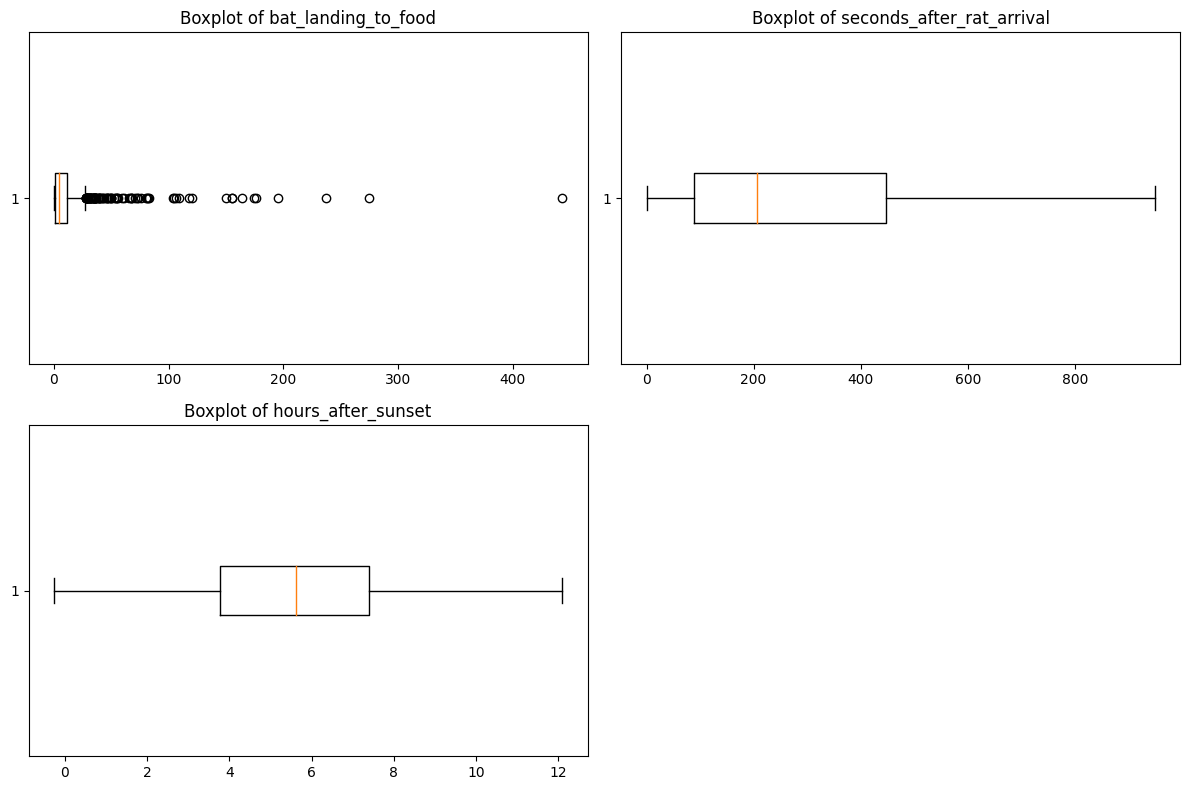

In [19]:
#plot the outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    plt.boxplot(df1[col], vert=False)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

only **`bat_landing_to_food`** shows the outliers. So we will only handle this column by cap the outliers at the upperbound.

In [20]:
df1['bat_landing_to_food'] = df1['bat_landing_to_food'].clip(upper=upper_bound)

### Feature engineering

For better analysis, I will do some feature engineering as said from the beginning:

- Unit standardization: convert all durations to the same units, as **`bat_landing_to_food`** and **`seconds_after_rat_arrival`** are already in the same units (seconds) so I will leave it as it is.

- Time binning  
  Bin the `hours_after_sunset` column into categorical periods:
  - `Before Sunset`: < 0 hours after sunset
  - `Dusk`: 0–2 hours after sunset  
  - `Night`: 2–6 hours after sunset  
  - `Late Night`: 6+ hours after sunset 

In [21]:
df1['hours_after_sunset'].describe()

count    907.000000
mean       5.531863
std        2.414146
min       -0.261667
25%        3.779028
50%        5.622778
75%        7.402778
max       12.091944
Name: hours_after_sunset, dtype: float64

In [22]:
# binning function for hours_after_sunset
def bin_hours_after_sunset(hours):
    if hours < 0:
        return 'Before Sunset'
    elif hours < 2:
        return 'Dusk'
    elif hours < 6:
        return 'Night'
    else:
        return 'Late Night'
df1['period_after_sunset'] = df1['hours_after_sunset'].apply(bin_hours_after_sunset)
df1['period_after_sunset'] = df1['period_after_sunset'].astype('category')


In [23]:
df1['period_after_sunset']

0            Dusk
1           Night
2           Night
3           Night
4           Night
          ...    
902    Late Night
903    Late Night
904    Late Night
905         Night
906    Late Night
Name: period_after_sunset, Length: 907, dtype: category
Categories (4, object): ['Before Sunset', 'Dusk', 'Late Night', 'Night']

#### Time rat spend on the platform

In [24]:
df1["time_rat_platform"] = df1["rat_period_end"] - df1["rat_period_start"]
df1['time_rat_platform'] = df1['time_rat_platform'].dt.total_seconds().astype(int)

df1['time_rat_platform']


0       180
1       300
2       300
3       300
4       300
       ... 
902     960
903     960
904     960
905     360
906    1980
Name: time_rat_platform, Length: 907, dtype: int64

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   start_time                 907 non-null    datetime64[ns]
 1   bat_landing_to_food        907 non-null    float64       
 2   habit                      907 non-null    category      
 3   rat_period_start           907 non-null    datetime64[ns]
 4   rat_period_end             907 non-null    datetime64[ns]
 5   seconds_after_rat_arrival  907 non-null    int64         
 6   risk                       907 non-null    category      
 7   reward                     907 non-null    category      
 8   month                      907 non-null    category      
 9   sunset_time                907 non-null    datetime64[ns]
 10  hours_after_sunset         907 non-null    float64       
 11  season                     907 non-null    category      
 12  habit_ca

In [26]:
df1.head()

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season,habit_category,period_after_sunset,time_rat_platform
0,2017-12-30 18:37:00,12.838403,rat,2017-12-30 18:35:00,2017-12-30 18:38:00,108,1,0,0,2017-12-30 16:45:00,1.870833,0,Presence Only,Dusk,180
1,2017-12-30 19:51:00,0.074016,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,17,0,1,0,2017-12-30 16:45:00,3.100833,0,Vigilance/Avoidance Behaviors,Night,300
2,2017-12-30 19:51:00,4.000000,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,41,0,1,0,2017-12-30 16:45:00,3.107500,0,Vigilance/Avoidance Behaviors,Night,300
3,2017-12-30 19:52:00,10.000000,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,111,1,0,0,2017-12-30 16:45:00,3.126944,0,Presence Only,Night,300
4,2017-12-30 19:54:00,12.838403,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,194,1,0,0,2017-12-30 16:45:00,3.150000,0,Presence Only,Night,300


## for dataset2

Similar to dataset1 structure, we now process dataset2 cleaning

### Data types check

In [27]:
df2.dtypes

time                   object
month                   int64
hours_after_sunset    float64
bat_landing_number      int64
food_availability     float64
rat_minutes           float64
rat_arrival_number      int64
dtype: object

Objective: Verify and standardize data types in dataset2 for consistent analysis

We have to unify all the data types:

- `time` column -> `datetime64` data type for temporal analysis
- `month` column -> `category` data type for efficient grouping in seasonal analysis


In [28]:
df2['time']= pd.to_datetime(df2['time'], format="%d/%m/%Y %H:%M", errors='coerce')
df2['month'] = df2['month'].astype('category')
df2.dtypes

time                  datetime64[ns]
month                       category
hours_after_sunset           float64
bat_landing_number             int64
food_availability            float64
rat_minutes                  float64
rat_arrival_number             int64
dtype: object

### Missing values check

In [29]:
df2.isna().sum()

time                  0
month                 0
hours_after_sunset    0
bat_landing_number    0
food_availability     0
rat_minutes           0
rat_arrival_number    0
dtype: int64

-> No missing values found, so no imputation is needed

### Outliers Detection and Handling

In [30]:
# Identify numerical columns
num_cols_2 = df2.select_dtypes(include=['float64', 'int64']).columns

print(num_cols_2)

# Understand the range
df2[num_cols_2].describe()

Index(['hours_after_sunset', 'bat_landing_number', 'food_availability',
       'rat_minutes', 'rat_arrival_number'],
      dtype='object')


,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
count,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000
mean,5.265426,32.083373,2.445874,1.994442,0.444654
std,4.076188,25.614431,1.218353,6.793397,1.019195
min,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,11.000000,1.962206,0.000000,0.000000
50%,5.000000,27.000000,2.951877,0.000000,0.000000
75%,8.500000,48.000000,3.105873,0.158333,1.000000
max,13.500000,178.000000,4.000000,120.000000,17.000000


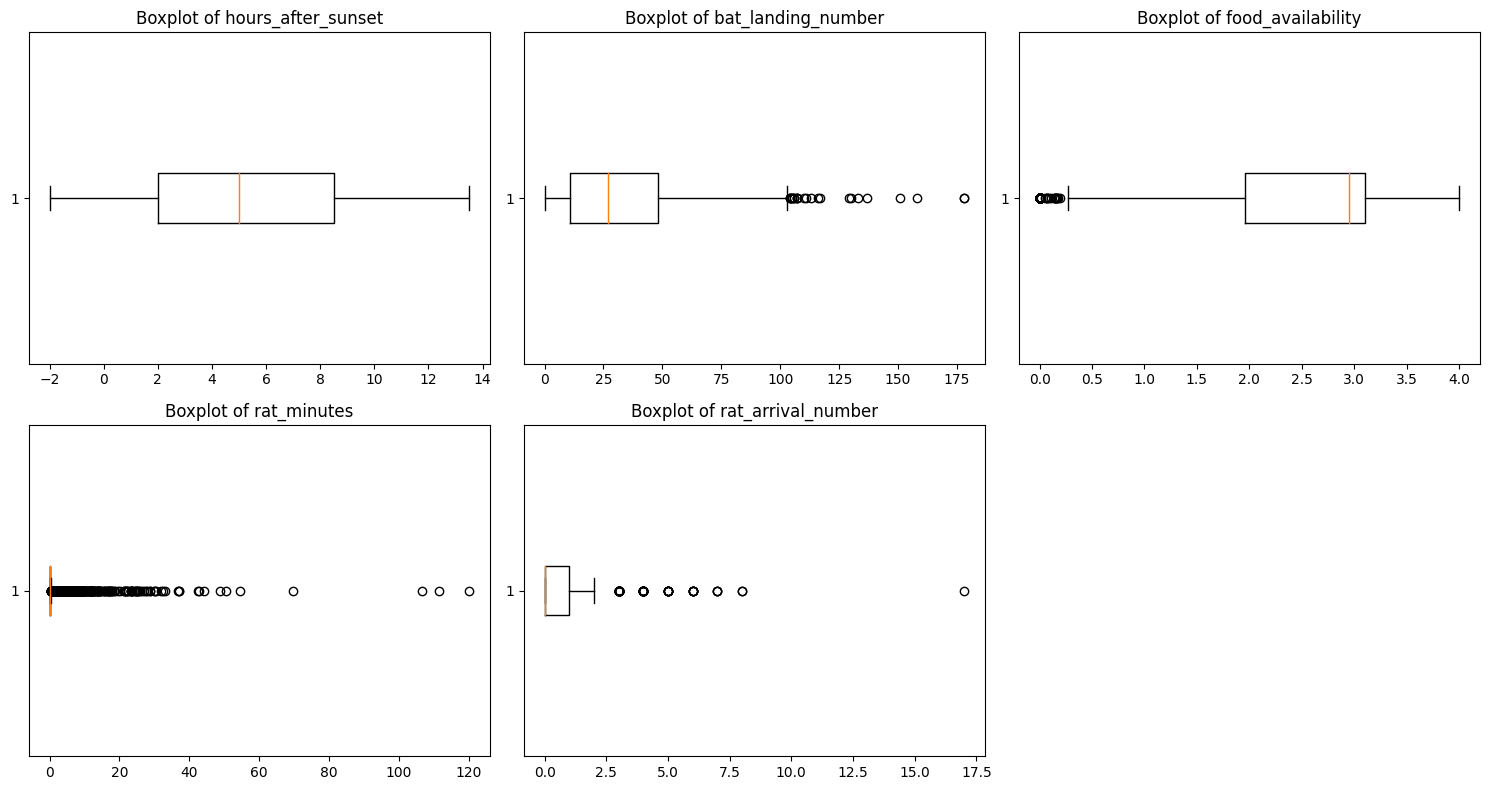

In [31]:
# Visualize outliers using boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols_2):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(df2[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


Summary Statistics (After Capping):
       hours_after_sunset  bat_landing_number  food_availability  rat_minutes  \
count         2123.000000         2123.000000        2123.000000  2123.000000   
mean             5.265426           31.877532           2.468437     1.796899   
std              4.076188           24.841421           1.174357     4.859708   
min             -2.000000            0.000000           0.246707     0.000000   
25%              2.000000           11.000000           1.962206     0.000000   
50%              5.000000           27.000000           2.951877     0.000000   
75%              8.500000           48.000000           3.105873     0.158333   
max             13.500000          103.500000           4.000000    30.000000   

       rat_arrival_number  
count         2123.000000  
mean             0.377296  
std              0.713339  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              1.000000  
max      

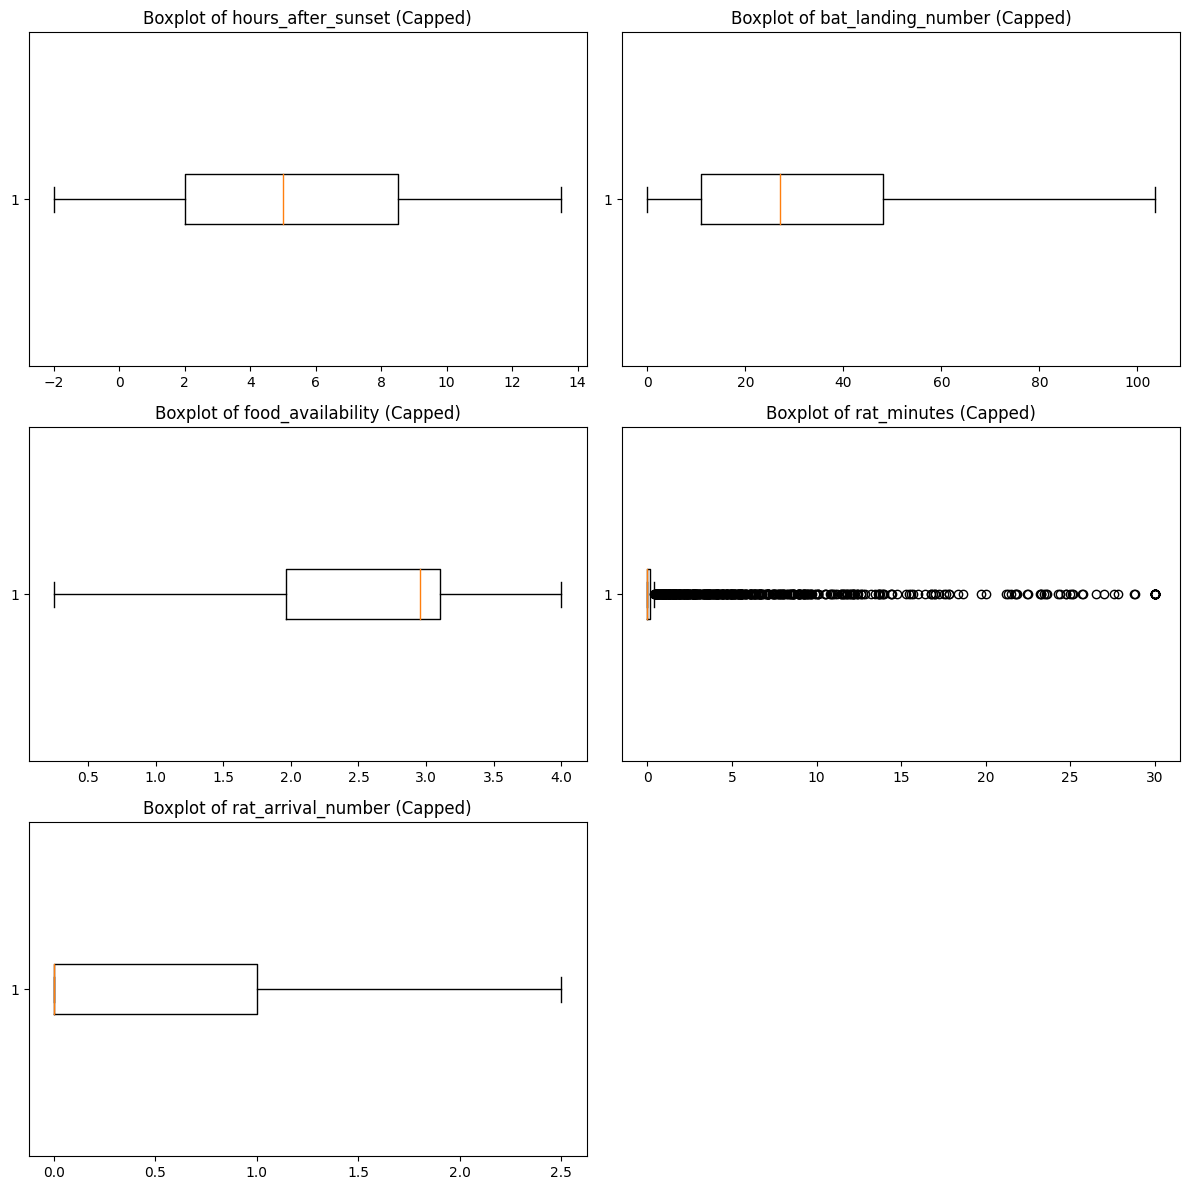

In [32]:
# Function to cap outliers using the IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Cap rat_minutes at 30 minutes to correct implausible values
df2['rat_minutes'] = df2['rat_minutes'].clip(upper=30)

# Apply capping to other numerical columns
for col in num_cols_2[num_cols_2 != 'rat_minutes']:
    df2 = cap_outliers(df2, col)

# Verify the range after capping
print("\nSummary Statistics (After Capping):")
print(df2[num_cols_2].describe())

# Plot boxplots to visualize the capped data
import matplotlib.pyplot as plt
n_cols = len(num_cols_2)
n_rows = (n_cols + 1) // 2
plt.figure(figsize=(12, 4 * n_rows))
for i, col in enumerate(num_cols_2):
    plt.subplot(n_rows, 2, i + 1)
    plt.boxplot(df2[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col} (Capped)')
plt.tight_layout()
plt.show()

### Feature engineering 

**Objective**: Create new features to support Investigations A and B
1. Convert `rat_minutes` to `rat_seconds` for unit standardization
2. Create `rat_present` to indicate rat presence (relevant for Investigation A)
3. Bin `hours_after_sunset` for temporal analysis (aligns with df1)
4. Add time_end for merging with dataset1


#### 1. Analyze rat_minutes distribution



Rat Minutes Distribution:
count    2123.000000
mean        1.796899
std         4.859708
min         0.000000
25%         0.000000
50%         0.000000
75%         0.158333
max        30.000000
Name: rat_minutes, dtype: float64


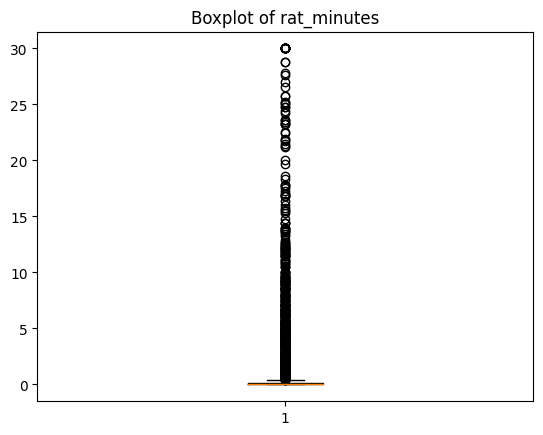

In [33]:
print("\nRat Minutes Distribution:")
print(df2['rat_minutes'].describe())
plt.boxplot(df2['rat_minutes'])
plt.title('Boxplot of rat_minutes')
plt.show()

Over 50% of the rat_minutes values are 0, meaning rats were not present during many 30-minute observation periods --> periods of no rat activity

--> Try using the zeros to create a binary indicator (`rat_present`) to distinguish between periods with and without rats

In [34]:
# Convert rat_minutes to rat_seconds for unit standardization
df2['rat_seconds'] = df2['rat_minutes'] * 60

df2.head()

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number,rat_seconds
0,2017-12-26 16:13:00,0,-0.5,20.0,4.000000,0.0,0.0,0.0
1,2017-12-26 16:43:00,0,0.0,28.0,4.000000,0.0,0.0,0.0
2,2017-12-26 17:13:00,0,0.5,25.0,4.000000,0.0,0.0,0.0
3,2017-12-26 17:43:00,0,1.0,71.0,4.000000,0.0,0.0,0.0
4,2017-12-26 18:13:00,0,1.5,44.0,3.753857,0.0,0.0,0.0


#### 2. Create rat_present to indicate rat presence

In [35]:
# Create binary indicator for rat presence (True if rats were present, False otherwise)
df2['rat_present'] = df2['rat_seconds'] > 0
print(df2['rat_present'].value_counts())

rat_present
False    1578
True      545
Name: count, dtype: int64


In [36]:
monthly_rat_activity = df2.groupby('month')['rat_seconds'].mean()
print("\nMean Rat Activity (Seconds) by Month:")
print(monthly_rat_activity)


Mean Rat Activity (Seconds) by Month:
month
0     29.769231
1     23.409894
2     30.569161
3     47.022727
4    166.803787
5    195.017375
6      0.000000
Name: rat_seconds, dtype: float64
/tmp/ipykernel_213/1735600922.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_rat_activity = df2.groupby('month')['rat_seconds'].mean()


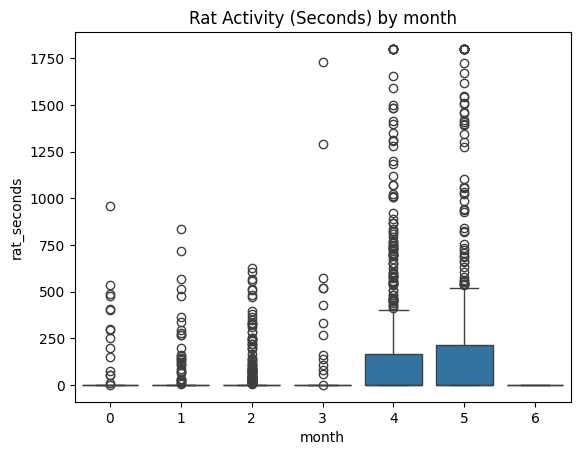

In [37]:
# Visualize rat activity by month to identify seasonal patterns
sns.boxplot(x='month', y='rat_seconds', data=df2)
plt.title('Rat Activity (Seconds) by month')
plt.show()

#### 3. Bin hours_after_sunset for temporal analysis

In [38]:
# Analyze hours_after_sunset distribution
df2['hours_after_sunset'].describe()

count    2123.000000
mean        5.265426
std         4.076188
min        -2.000000
25%         2.000000
50%         5.000000
75%         8.500000
max        13.500000
Name: hours_after_sunset, dtype: float64

In [39]:
# Bin hours_after_sunset into Dusk, Night, Late Night (aligned with df1)
df2['period_after_sunset'] = df2['hours_after_sunset'].apply(bin_hours_after_sunset)
df2['period_after_sunset'] = df2['period_after_sunset'].astype('category')

df2['period_after_sunset']

0       Before Sunset
1                Dusk
2                Dusk
3                Dusk
4                Dusk
            ...      
2118       Late Night
2119       Late Night
2120       Late Night
2121       Late Night
2122       Late Night
Name: period_after_sunset, Length: 2123, dtype: category
Categories (4, object): ['Before Sunset', 'Dusk', 'Late Night', 'Night']

#### 4. Add `time_end` for merging with dataset1

In [40]:
df2['time_end'] = df2['time'] + pd.Timedelta(minutes=30)

## Merge Datasets

**Objective**: Combine dataset1 and dataset2 to align bat landings with 30-minute periods

**Logic**: 
- Dataset1 has individual bat landing events with `start_time`
- Dataset2 has 30-minute observation periods with start times (`time`)
--> So we can create an `time_end` column in dataset2 to match each bat landing to the 30-minute periods it falls within

### Standardise Month Categories

Objective: Ensure consistent month categories for both datasets (0 to 6 for a 7-month study)

In [41]:
month_categories = list(range(0, 7))  # Covers 7-month study period
df1['month'] = pd.Categorical(df1['month'], categories=month_categories, ordered=True)
df2['month'] = pd.Categorical(df2['month'], categories=month_categories, ordered=True)

print("\nUpdated df1 Month Categories:", df1['month'].cat.categories)
print("Updated df2 Month Categories:", df2['month'].cat.categories)


Updated df1 Month Categories: Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')
Updated df2 Month Categories: Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')


In [42]:
# Sort both datasets by time to ensure proper matching
df1 = df1.sort_values('start_time')
df2 = df2.sort_values('time')

# Match each landing to the nearest 30-minute period
df_combined = pd.merge_asof(
    df1,
    df2,
    left_on='start_time',
    right_on='time',
    direction='backward',  # Match to the most recent period start
    allow_exact_matches=True
)

# Filter rows where start_time is within the 30-minute window
df_combined = df_combined[
    (df_combined['start_time'] >= df_combined['time']) &
    (df_combined['start_time'] < df_combined['time_end'])
]

In [43]:
# Verify combined dataset
print("\nCombined Dataset Preview:")
print(df_combined.head())


Combined Dataset Preview:
           start_time  bat_landing_to_food habit    rat_period_start  \
0 2017-12-26 20:57:00             1.000000   nan 2017-12-26 20:53:00   
1 2017-12-26 20:57:00             5.000000   nan 2017-12-26 20:53:00   
2 2017-12-26 21:24:00             3.000000  fast 2017-12-26 21:22:00   
3 2017-12-26 21:24:00            12.838403   rat 2017-12-26 21:22:00   
4 2017-12-26 21:24:00             6.000000  pick 2017-12-26 21:22:00   

       rat_period_end  seconds_after_rat_arrival risk reward month_x  \
0 2017-12-26 20:58:00                        239    0      0       0   
1 2017-12-26 20:58:00                        199    0      0       0   
2 2017-12-26 21:27:00                        121    0      1       0   
3 2017-12-26 21:27:00                         88    1      0       0   
4 2017-12-26 21:27:00                        113    0      1       0   

          sunset_time  ...  month_y hours_after_sunset_y bat_landing_number  \
0 2017-12-26 16:43:00  ...  

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 16 to 675
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   start_time                 907 non-null    datetime64[ns]
 1   bat_landing_to_food        907 non-null    float64       
 2   habit                      907 non-null    category      
 3   rat_period_start           907 non-null    datetime64[ns]
 4   rat_period_end             907 non-null    datetime64[ns]
 5   seconds_after_rat_arrival  907 non-null    int64         
 6   risk                       907 non-null    category      
 7   reward                     907 non-null    category      
 8   month                      907 non-null    category      
 9   sunset_time                907 non-null    datetime64[ns]
 10  hours_after_sunset         907 non-null    float64       
 11  season                     907 non-null    category      
 12  habit_catego

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   time                 2123 non-null   datetime64[ns]
 1   month                2123 non-null   category      
 2   hours_after_sunset   2123 non-null   float64       
 3   bat_landing_number   2123 non-null   float64       
 4   food_availability    2123 non-null   float64       
 5   rat_minutes          2123 non-null   float64       
 6   rat_arrival_number   2123 non-null   float64       
 7   rat_seconds          2123 non-null   float64       
 8   rat_present          2123 non-null   bool          
 9   period_after_sunset  2123 non-null   category      
 10  time_end             2123 non-null   datetime64[ns]
dtypes: bool(1), category(2), datetime64[ns](2), float64(6)
memory usage: 139.6 KB


In [63]:
df_combined[['start_time', 'time', 'time_end']]

,start_time,time,time_end
0,2017-12-26 20:57:00,2017-12-26 20:43:00,2017-12-26 21:13:00
1,2017-12-26 20:57:00,2017-12-26 20:43:00,2017-12-26 21:13:00
2,2017-12-26 21:24:00,2017-12-26 21:13:00,2017-12-26 21:43:00
3,2017-12-26 21:24:00,2017-12-26 21:13:00,2017-12-26 21:43:00
4,2017-12-26 21:24:00,2017-12-26 21:13:00,2017-12-26 21:43:00
...,...,...,...
902,2018-05-21 02:54:00,2018-05-21 02:34:00,2018-05-21 03:04:00
903,2018-05-21 02:57:00,2018-05-21 02:34:00,2018-05-21 03:04:00
904,2018-05-21 23:09:00,2018-05-21 23:05:00,2018-05-21 23:35:00
905,2018-05-21 23:19:00,2018-05-21 23:05:00,2018-05-21 23:35:00


In [54]:
df_combined.to_csv("df_combined")

In [45]:
# Verify month alignment after standardization
print("\nMismatch in Months After Standardization:")
print(df_combined[df_combined['month_x'] != df_combined['month_y']].shape[0])

# Display mismatched rows for debugging
mismatches = df_combined[df_combined['month_x'] != df_combined['month_y']][
    ['start_time', 'time', 'month_x', 'month_y']
]
print("\nMismatched Rows Sample:")
print(mismatches)


Mismatch in Months After Standardization:
8

Mismatched Rows Sample:
             start_time                time month_x month_y
675 2018-05-01 00:06:00 2018-04-30 23:50:00       5       4
676 2018-05-01 00:06:00 2018-04-30 23:50:00       5       4
677 2018-05-01 00:06:00 2018-04-30 23:50:00       5       4
678 2018-05-01 00:07:00 2018-04-30 23:50:00       5       4
679 2018-05-01 00:07:00 2018-04-30 23:50:00       5       4
680 2018-05-01 00:08:00 2018-04-30 23:50:00       5       4
681 2018-05-01 00:09:00 2018-04-30 23:50:00       5       4
682 2018-05-01 00:09:00 2018-04-30 23:50:00       5       4


In [66]:
df1

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season,habit_category,period_after_sunset,time_rat_platform
16,2017-12-26 20:57:00,1.000000,nan,2017-12-26 20:53:00,2017-12-26 20:58:00,239,0,0,0,2017-12-26 16:43:00,4.248611,0,Unknown,Night,300
15,2017-12-26 20:57:00,5.000000,nan,2017-12-26 20:53:00,2017-12-26 20:58:00,199,0,0,0,2017-12-26 16:43:00,4.237500,0,Unknown,Night,300
9,2017-12-26 21:24:00,3.000000,fast,2017-12-26 21:22:00,2017-12-26 21:27:00,121,0,1,0,2017-12-26 16:43:00,4.693611,0,Vigilance/Avoidance Behaviors,Night,300
7,2017-12-26 21:24:00,12.838403,rat,2017-12-26 21:22:00,2017-12-26 21:27:00,88,1,0,0,2017-12-26 16:43:00,4.684444,0,Presence Only,Night,300
8,2017-12-26 21:24:00,6.000000,pick,2017-12-26 21:22:00,2017-12-26 21:27:00,113,0,1,0,2017-12-26 16:43:00,4.691389,0,Foraging/Competition Behaviors,Night,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,2018-05-21 02:54:00,7.000000,nan,2018-05-21 02:49:00,2018-05-21 02:57:00,306,0,0,5,2018-05-20 19:34:00,7.348611,1,Unknown,Late Night,480
764,2018-05-21 02:57:00,12.838403,rat_bat_fight,2018-05-21 02:49:00,2018-05-21 02:57:00,455,1,0,5,2018-05-20 19:34:00,7.390000,1,Aggressive Interactions,Late Night,480
758,2018-05-21 23:09:00,0.062304,nan,2018-05-21 23:09:00,2018-05-21 23:09:00,15,0,0,5,2018-05-21 19:35:00,3.574167,1,Unknown,Night,0
757,2018-05-21 23:19:00,12.838403,bat_pick,2018-05-21 23:17:00,2018-05-21 23:20:00,116,1,1,5,2018-05-21 19:35:00,3.736111,1,Foraging/Competition Behaviors,Night,180


-> There are 8 mismatches due to midight boundary (bat landings on 2018-05-01 00:06:00 still macthed to periods starting 2018-04-30 23:50:00 but it will appear in different months)

--> Will ignore this as the data is still correct (landings are within the 30-minute period), and the impact on Investigations A and B is minimal

# EDA

# ANALYSIS

## INVESTIGATION A - BAT PERCEPTION OF RAT

### Feature engineering: Rat presence, response time, risk-taking

✅ Feature Engineering

This means creating usable variables from raw data that you will analyze.

You have these 3 features:
	1.	Rat presence — a binary feature (Yes/No or 1/0) indicating if a rat was present in the scenario.
	2.	Response time — how many seconds it took the human to respond (you already have the raw values).
	3.	Risk-taking — a score or category showing how risky the person’s action was (you may have to calculate or rate it from data).

👉 What to do:
	•	Decide how each is represented in your dataset (numeric / category).
	•	Example: rat_present = 1, no_rat = 0, risk_taken = high/medium/low or a number.

### Descriptive stats: Behaviour with vs without rats

✅ Descriptive Statistics

You simply summarize your data to see what’s going on — especially comparing situations with rats vs without rats.

Things you will calculate:
	•	Mean response time with rats vs without rats
	•	Median, standard deviation, maybe counts
	•	Average risk-taking score with vs without rats

👉 What to do now:
	•	Put your data in a table or spreadsheet
	•	Use Excel / Python / SPSS to compute basic stats
	•	Summarize them in a small table for your report

### Inferential analysis: t-tests (2 groups), chi-square tests (depend on the data)

✅ Inferential Analysis

Now you’re testing whether the differences you see in the descriptive stats are statistically significant.

Use appropriate tests:

Response time (numeric) : t-test (comparing two means)
Rat presence vs Risk-taking category: Chi-square test

### Visualizations: Boxplots, bar graphs, timelines, etc. 

✅ Visualizations

Plot your findings so they’re easy to understand.

The ones you need:
	•	Boxplot — show the distribution of response times (with rat vs no rat)
	•	Bar Graph — show count of high risk vs low risk actions in rat vs no rat
	•	Timeline — if your study is over time, show when rats appeared and how response changed over time

👉 What to do:
You can do these in Excel, Python, or even Google Sheets:
	•	Draw a boxplot comparing two groups
	•	Bar chart of counts or averages
	•	If you have timestamps, make a simple timeline of events

## INVESTIGATION B - SEASONAL BEHAVIOR CHANGES

### Filter datasets by season and month

### Analyze seasonal trends in bat and rat activities

### Compare behaviour across winter vs spring

### Optional: incorporate external environmental data

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=74c414ef-560d-420d-b4af-809d2b670979' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>